In [5]:
import texthero as hero
try:
    import tabula
except:
    !pip install tabula-py
    import tabula

In [13]:
dataframes = tabula.read_pdf("../dataset/complaints.pdf", pages='all')

In [14]:
df = dataframes[0]
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Tags,Consumer cons,nSt upbrmovitidteedd ?via,Date sent to co,pCaonmy pany respo,sTeim toe lcyo rnessupmonesre,Consumer dispu,eCdo?mplaint ID
0,41484,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Wells Fargo & Company,VA,24540,NaN,N/A,Phone,41485,Closed with expl,Ynaetsion,No,468882
1,41484,Bank account or,Cehrveickeing accou,tUsing a debit or ATM card,NaN,Wells Fargo & Company,CA,95992,Older American,N/A,Web,41486,Closed with expl,Ynaetsion,No,468889
2,41484,Bank account or,Cehrveickeing accou,"tAccount opening, closing, or management",NaN,Santander Bank US,NY,10065,NaN,N/A,Fax,41486,Closed,Yes,No,468879
3,41484,Bank account or,Cehrveickeing accou,tDeposits and withdrawals,NaN,Wells Fargo & Company,GA,30084,NaN,N/A,Web,41485,Closed with expl,Ynaetsion,No,468949
4,41484,Mortgage,Conventional fix,"dL omaonr tsgeargviecing, payments, escrow acc...",NaN,Franklin Credit Management,CT,6106,NaN,N/A,Web,41485,Closed with expl,Ynaetsion,No,475823


In [15]:
df['issue_clean'] = df['Issue'].pipe(hero.clean)

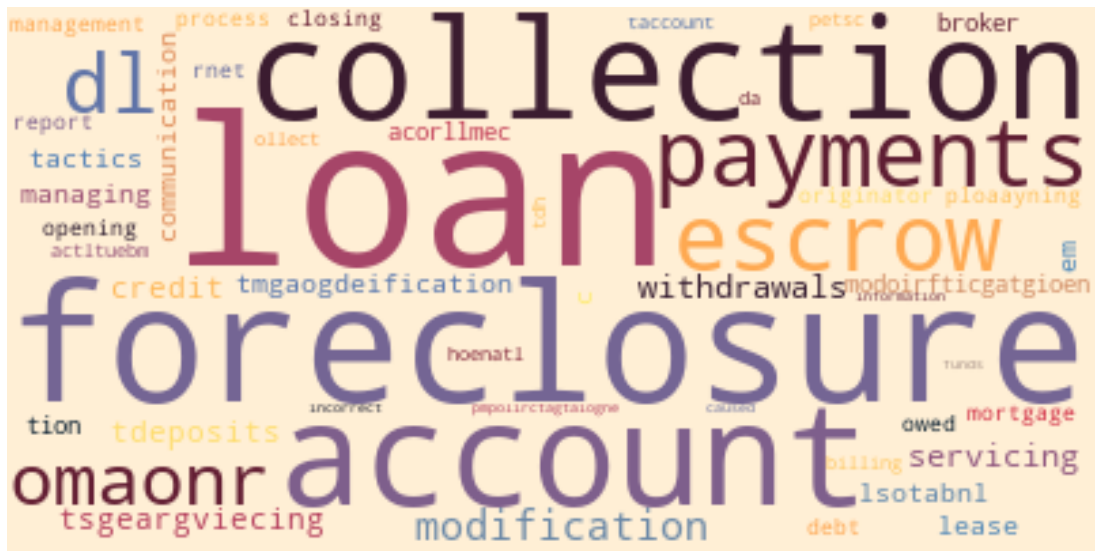

In [16]:
df['issue_clean'].pipe(hero.wordcloud, max_words=50)

In [40]:
try:
    from tika import parser
except:
    !pip install tika
    from tika import parser

In [ ]:
parsedPDF = parser.from_file("../dataset/complaints.pdf")

In [ ]:
pdf = parsedPDF['content'].replace('\n\n', '\n')

In [42]:
try:
    import pdfplumber
except:
    !pip install pdfplumber
    import pdfplumber

     |████████████████████████████████| 13.3MB 114kB/s eta 0:00:01
     |████████████████████████████████| 5.6MB 544kB/s eta 0:00:01
     |████████████████████████████████| 133kB 377kB/s eta 0:00:01
Failed to build pdfplumber unicodecsv
    Running setup.py install for unicodecsv ... done
  Found existing installation: pdfminer.six 20200720
    Uninstalling pdfminer.six-20200720:
      Successfully uninstalled pdfminer.six-20200720
    Running setup.py install for pdfplumber ... done


In [84]:
pdf = pdfplumber.open("../dataset/complaints.pdf")
pdf.pages

In [85]:
page = pdf.pages[0]

In [ ]:
page.extract_table(table_settings={
    "vertical_strategy": "text", 
    "horizontal_strategy": "text",
    "explicit_vertical_lines": [],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "join_tolerance": 2,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 2,
    "text_x_tolerance": 1,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
})[1]

In [17]:
# from pdfminer.high_level import extract_text
# text = extract_text('../dataset/complaints.pdf')